# Análise exploratória parte 2 + Data Cleaning
Com as colunas mais bem preparadas será realizada uma nova análise mais aprofundada dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

### Exploração da estrutura dos dados

In [3]:
data = pd.read_csv("datasets/movies_metadata_EDA.csv", low_memory=False)
print(f"Rows: {data.shape[0]} - Columns: {data.shape[1]}")
print(f"Column names: {data.columns}")
data.head(5)

Rows: 45466 - Columns: 19
Column names: Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'tmdb_id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'title', 'vote_average'],
      dtype='object')


,adult,belongs_to_collection,budget,genres,tmdb_id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average
0,False,toy story collection,30000000,"['animation', 'comedy', 'family']",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,['pixar_animation_studios'],['us'],1995-10-30,373554033.0,81.0,['en'],Toy Story,7.7
1,False,[],65000000,"['adventure', 'fantasy', 'family']",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"['tristar_pictures', 'teitler_film', 'intersco...",['us'],1995-12-15,262797249.0,104.0,"['en', 'fr']",Jumanji,6.9
2,False,grumpy old men collection,0,"['romance', 'comedy']",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"['warner_bros.', 'lancaster_gate']",['us'],1995-12-22,0.0,101.0,['en'],Grumpier Old Men,6.5
3,False,[],16000000,"['comedy', 'drama', 'romance']",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,['twentieth_century_fox_film_corporation'],['us'],1995-12-22,81452156.0,127.0,['en'],Waiting to Exhale,6.1
4,False,father of the bride collection,0,['comedy'],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"['sandollar_productions', 'touchstone_pictures']",['us'],1995-02-10,76578911.0,106.0,['en'],Father of the Bride Part II,5.7


#### Apresentação de estatísticas

In [4]:
print(f"Numerical statistics\n{data.describe()}", end="\n========\n")

Numerical statistics
            revenue       runtime  vote_average
count  4.546000e+04  45203.000000  45460.000000
mean   1.120935e+07     94.128199      5.618207
std    6.433225e+07     38.407810      1.924216
min    0.000000e+00      0.000000      0.000000
25%    0.000000e+00     85.000000      5.000000
50%    0.000000e+00     95.000000      6.000000
75%    0.000000e+00    107.000000      6.800000
max    2.787965e+09   1256.000000     10.000000


In [5]:
print(f"Null values\n{data.isnull().sum()}", end="\n========\n\n")

Null values
adult                      0
belongs_to_collection      0
budget                     0
genres                     0
tmdb_id                    0
imdb_id                   17
original_language         11
original_title             0
overview                 954
popularity                 5
poster_path              386
production_companies       0
production_countries       0
release_date              87
revenue                    6
runtime                  263
spoken_languages           0
title                      6
vote_average               6
dtype: int64



In [6]:
print(f"Unique values\n{data.nunique()}", end="\n========\n\n")

Unique values
adult                        5
belongs_to_collection     1649
budget                    1226
genres                    4069
tmdb_id                  45436
imdb_id                  45417
original_language           92
original_title           43373
overview                 44307
popularity               43758
poster_path              45024
production_companies     22601
production_countries      2393
release_date             17336
revenue                   6863
runtime                    353
spoken_languages          1931
title                    42277
vote_average                92
dtype: int64



In [7]:
print(f"Column types\n{data.dtypes}", end="\n========\n\n")

Column types
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
tmdb_id                   object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
title                     object
vote_average             float64
dtype: object



### Definição da importância das colunas
##### Necessárias
<ol>
<li>genres
<li>release_date
<li>runtime
<li>vote_average
<li>overview
<li>title
</ol>

##### Desejadas
<ol>
<li>original_language
<li>revenue
<li>spoken_languages
<li>popularity
<li>budget
<li>production_countries
<li>production_companies
<li>belongs_to_collection
<li>adult
<li>poster_path
</ol>

##### Índices
<ol>
<li>imdb_id
<li>tmdb_id
</ol>

##### Desnecessárias
<ol>
<li>original_title
</ol>

##

### Data Cleaning
- Valores nulos
- Anomalias
- Distribuição dos valores

In [8]:
data.drop(columns="original_title", inplace=True)
print(data.shape)

(45466, 18)


#### Funções auxiliares

In [9]:
#### Utils functions
def summary(data: pd.DataFrame, column: str):
    print(f"Description:\n{data[column].describe()}", end="\n---\n")
    print(f"Unique values:\n{data[column].nunique()}", end="\n---\n")
    print(f"Top 10 values:\n{pd.DataFrame(data[column].value_counts()).head(10)}", end="\n---\n")
    print(f"Least 5 values:\n{pd.DataFrame(data[column].value_counts()).tail(5)}", end="\n---\n")
    print(f"IS_NULL: {data[column].isnull().sum()}")

def dropna_row(data: pd.DataFrame, column: str):
    data_drop = data.copy()
    data_drop.drop(data_drop.loc[data_drop[column].isnull()].index, inplace=True)
    data_drop.reset_index(drop=True, inplace=True)
    return data_drop.copy()

def plot_values(data: pd.DataFrame, column: str):
    values = data[column].value_counts()
    top_values = values[:10]
    color = ["blue"]*10

    plt.figure(figsize=(8,8))
    plt.title(column)
    plt.bar(x=np.arange(len(top_values)), height=top_values.values, color=color)
    plt.xticks(ticks=np.arange(len(top_values)), labels=top_values.index, rotation=70)
    plt.show()

def plot_hist(x: pd.Series, x_axis="", nbins=25, title=""):
    plt.hist(x, bins=nbins)
    plt.xlabel(x_axis)
    plt.ylabel("#")
    plt.title(title)
    plt.show()

### Indexes

In [10]:
print("TMDB index")
summary(data, "tmdb_id")

TMDB index
Description:
count      45466
unique     45436
top       141971
freq           3
Name: tmdb_id, dtype: object
---
Unique values:
45436
---
Top 10 values:
         count
tmdb_id       
141971       3
168538       2
25541        2
15028        2
11115        2
84198        2
13209        2
77221        2
152795       2
12600        2
---
Least 5 values:
         count
tmdb_id       
72272        1
1549         1
10171        1
38996        1
461257       1
---
IS_NULL: 0


In [11]:
# Removendo índices repetidos
data.drop_duplicates(subset=["tmdb_id"], keep="first", inplace=True)

In [12]:
# IMDB ID
summary(data, "imdb_id")

Description:
count     45419
unique    45417
top           0
freq          3
Name: imdb_id, dtype: object
---
Unique values:
45417
---
Top 10 values:
           count
imdb_id         
0              3
tt0114709      1
tt0167320      1
tt0061658      1
tt1466069      1
tt1756479      1
tt0073014      1
tt1924273      1
tt0045708      1
tt2933544      1
---
Least 5 values:
           count
imdb_id         
tt0062377      1
tt0204504      1
tt0970452      1
tt0033405      1
tt6980792      1
---
IS_NULL: 17


In [13]:
# Removendo índices nulos
data = dropna_row(data, "imdb_id")

### Genres

In [14]:
summary(data, "genres")

Description:
count         45419
unique         4068
top       ['drama']
freq           4996
Name: genres, dtype: object
---
Unique values:
4068
---
Top 10 values:
                                count
genres                               
['drama']                        4996
['comedy']                       3620
['documentary']                  2721
[]                               2437
['drama', 'romance']             1300
['comedy', 'drama']              1133
['horror']                        974
['comedy', 'romance']             930
['comedy', 'drama', 'romance']    593
['drama', 'comedy']               531
---
Least 5 values:
                                                  count
genres                                                 
['adventure', 'drama', 'war', 'history']              1
['science_fiction', 'comedy', 'adventure']            1
['music', 'drama', 'comedy', 'crime', 'romance']      1
['action', 'drama', 'comedy', 'documentary']          1
['family', 'animation', 

In [15]:
# Quais gêneros estão presentes?
data_genres = data['genres']
genres_list = []
for aux_row in data_genres:
    genres_list.extend(aux_row.replace("'", "").strip("[]").split(", "))

available_genres = dict(Counter(genres_list))

# Gêneros menos comuns, presentes em menos de 1000 filmes 
uncommon_genres = [genre for genre, count in available_genres.items() if count < 1000]

# Excluindo filmes com gêneros menos comuns
# Estratégia para eliminar possíveis outliers
index_to_drop_by_genres = []
for id_, genres in zip(data_genres.index, data_genres):
    genre = genres.replace("'", "").strip("[]").split(", ")
    has_uncommon = set(genre).intersection(set(uncommon_genres))

    if not genre[0] or has_uncommon:
        index_to_drop_by_genres.append(id_)

data.drop(index_to_drop_by_genres, inplace=True)
data.reset_index(drop=True, inplace=True)

### Release date
- Remover filmes sem data de lançamento

In [16]:
summary(data, "release_date")

Description:
count          42186
unique         16685
top       2008-01-01
freq             123
Name: release_date, dtype: object
---
Unique values:
16685
---
Top 10 values:
              count
release_date       
2008-01-01      123
2009-01-01      109
2007-01-01      107
2005-01-01      101
2006-01-01       90
2002-01-01       86
2004-01-01       83
2001-01-01       71
2003-01-01       67
1997-01-01       55
---
Least 5 values:
              count
release_date       
1935-08-09        1
1964-03-24        1
2009-02-22        1
1940-05-25        1
1991-05-13        1
---
IS_NULL: 27


In [17]:
data = dropna_row(data, "release_date")

#### Extraindo anos das datas de lançamento

In [18]:
release_year = [int(date.split("-")[0]) for date in data["release_date"]]
data["release_date"] = release_year
data.rename(columns={"release_date":"release_year"}, inplace=True)

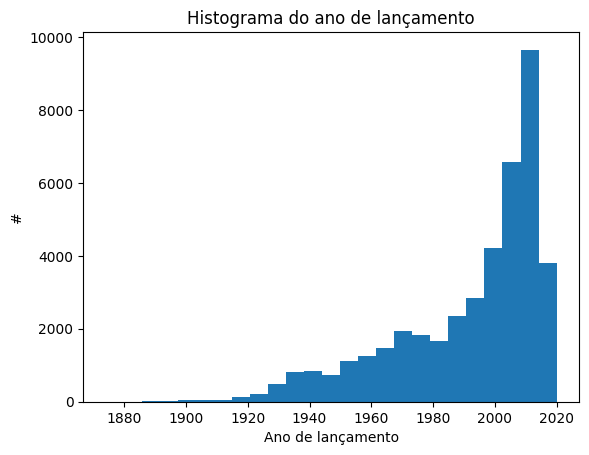

In [19]:
plot_hist(data["release_year"], x_axis="Ano de lançamento", title="Histograma do ano de lançamento")

### Runtime
- Apagar valores nulos
- Selecionar espaço mais recorrente

In [20]:
summary(data, "runtime")

Description:
count    42022.000000
mean        95.516777
std         36.363899
min          0.000000
25%         86.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64
---
Unique values:
340
---
Top 10 values:
         count
runtime       
90.0      2340
100.0     1364
95.0      1340
93.0      1159
0.0       1065
96.0      1044
92.0      1032
94.0      1017
91.0      1002
97.0       977
---
Least 5 values:
         count
runtime       
230.0        1
442.0        1
925.0        1
399.0        1
275.0        1
---
IS_NULL: 164


Filme com quase 21 horas de duração???

In [21]:
data = dropna_row(data, "runtime")

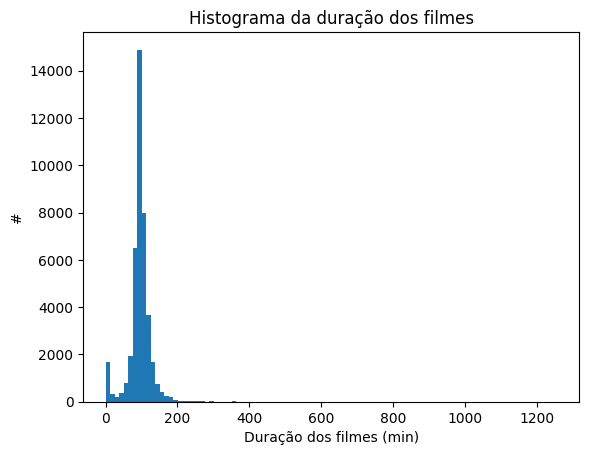

In [22]:
plot_hist(data["runtime"], x_axis="Duração dos filmes (min)", title="Histograma da duração dos filmes", nbins=100)

#### Definindo limites
Selecionando filmes com duração (minutos) entre [30, 210]

In [23]:
def filter_runtime(runtime):
    return 30 <= runtime <= 210

runtime_out_limit = [not(filter_runtime(runtime)) for runtime in data["runtime"]]
runtime_drop = data.loc[runtime_out_limit].index
data.drop(runtime_drop, inplace=True)
data.reset_index(drop=True, inplace=True)

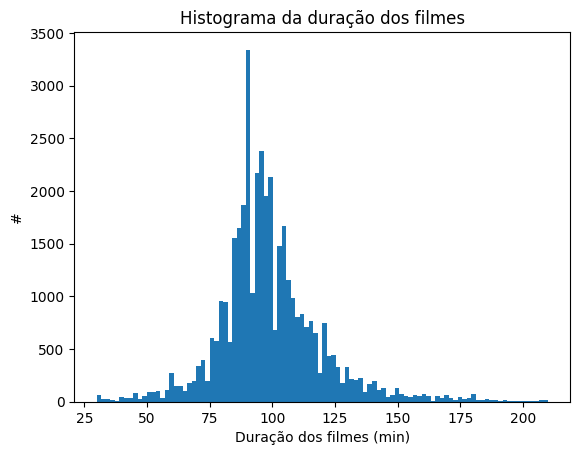

In [24]:
plot_hist(data["runtime"], x_axis="Duração dos filmes (min)", title="Histograma da duração dos filmes", nbins=100)

#### Votação média
- Apagar valores nulos
- Nesse contexto 0 != null ???

In [25]:
summary(data, "vote_average")

Description:
count    39672.000000
mean         5.722111
std          1.747760
min          0.000000
25%          5.100000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64
---
Unique values:
91
---
Top 10 values:
              count
vote_average       
6.0            2093
0.0            1885
5.0            1627
7.0            1556
6.5            1547
6.3            1463
5.8            1278
6.4            1269
5.5            1237
6.7            1231
---
Least 5 values:
              count
vote_average       
9.4               3
9.1               2
9.8               1
0.7               1
1.1               1
---
IS_NULL: 0


In [26]:
### Apagando filmes com votação = 0
low_rated_index = data.loc[data["vote_average"] == 0,:].index
data.drop(low_rated_index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [27]:
summary(data, "vote_average")

Description:
count    37787.000000
mean         6.007558
std          1.221543
min          0.500000
25%          5.300000
50%          6.100000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64
---
Unique values:
90
---
Top 10 values:
              count
vote_average       
6.0            2093
5.0            1627
7.0            1556
6.5            1547
6.3            1463
5.8            1278
6.4            1269
5.5            1237
6.7            1231
6.8            1203
---
Least 5 values:
              count
vote_average       
9.4               3
9.1               2
9.8               1
0.7               1
1.1               1
---
IS_NULL: 0


### Overview (Resumo)
- Apagar valores nulos

In [28]:
summary(data, "overview")

Description:
count                  37584
unique                 37468
top       No overview found.
freq                      97
Name: overview, dtype: object
---
Unique values:
37468
---
Top 10 values:
                                                    count
overview                                                 
No overview found.                                     97
                                                        3
A few funny little novels about different aspec...      3
No Overview                                             2
When four women move into an old house left by ...      2
The ghost of a samurai's wife takes revenge on ...      2
The Kingdom of the People of the Vale once rule...      2
Wilbur the pig is scared of the end of the seas...      2
Adventurer Allan Quartermain leads an expeditio...      2
With friends like these, who needs enemies? Tha...      2
---
Least 5 values:
                                                    count
overview               

In [29]:
# Apagar valores nulos
empty_overview = data.loc[data["overview"].isnull(),:].index
data.drop(empty_overview, inplace=True)
data.reset_index(drop=True, inplace=True)

In [31]:
# Apagar linhas com resumo igual a "No overview found.", "No overview"
no_overview = ["No overview found.", "No Overview", " "]
drop_overview = [overview in no_overview for overview in data["overview"]]
drop_overview_id = data.loc[drop_overview,:].index
data.drop(drop_overview_id, inplace=True)
data.reset_index(drop=True, inplace=True)

In [32]:
summary(data, "overview")

Description:
count                                                 37482
unique                                                37465
top       A few funny little novels about different aspe...
freq                                                      3
Name: overview, dtype: object
---
Unique values:
37465
---
Top 10 values:
                                                    count
overview                                                 
A few funny little novels about different aspec...      3
The ghost of a samurai's wife takes revenge on ...      2
Director Michael Apted revisits the same group ...      2
With friends like these, who needs enemies? Tha...      2
Wilbur the pig is scared of the end of the seas...      2
Mary, a writer working on a novel about a love ...      2
A group of travelers, including a monk, stay in...      2
The Kingdom of the People of the Vale once rule...      2
When four women move into an old house left by ...      2
Miser Ebenezer Scrooge is awakened 

In [33]:
# Por que alguns resumos aparecem mais de uma vez???
data.loc[data["overview"] == "A few funny little novels about different aspects of life."]

,adult,belongs_to_collection,budget,genres,tmdb_id,imdb_id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_year,revenue,runtime,spoken_languages,title,vote_average
26630,False,the comics collection,0,['comedy'],43646,tt0099293,it,A few funny little novels about different aspe...,2.520134,/7bd4nNtxNMlsJc2ysEJMJ01HY36.jpg,[],['it'],1990,0.0,90.0,['it'],The Comics,5.7
26631,False,the comics collection,0,['comedy'],43648,tt0103991,it,A few funny little novels about different aspe...,1.999079,/fIhoGGxL8flbYQPTt7F1xeSxEKh.jpg,[],['it'],1991,0.0,91.0,['it'],The Comics 2,5.5
26632,False,the comics collection,0,['comedy'],43649,tt0159611,it,A few funny little novels about different aspe...,1.254781,/rbcrzKi4qdQ0D5vEokTQCOlpvRS.jpg,[],['it'],1994,0.0,102.0,['it'],The New Comics,5.0


In [37]:
# Parece que os filmes com resumo igual são da mesma coleção
overview_counts = pd.DataFrame(data["overview"].value_counts())
overview_counts
repeated_overviews = overview_counts.loc[overview_counts["count"] > 1].index
data.loc[data["overview"].isin(repeated_overviews), ["release_year","overview", "title", "belongs_to_collection","vote_average"]].sort_values("overview")

,release_year,overview,title,belongs_to_collection,vote_average
26632,1994,A few funny little novels about different aspe...,The New Comics,the comics collection,5.0
26631,1991,A few funny little novels about different aspe...,The Comics 2,the comics collection,5.5
26630,1990,A few funny little novels about different aspe...,The Comics,the comics collection,5.7
25047,1951,"A group of travelers, including a monk, stay i...",The Red Inn,[],6.6
30105,2007,"A group of travelers, including a monk, stay i...",The Red Inn,[],5.0
28618,1975,A wooden boy Buratino tries to find his place ...,The Adventures of Buratino,[],5.4
36560,1959,A wooden boy Buratino tries to find his place ...,The Adventures of Buratino,[],4.4
4417,1937,Adventurer Allan Quartermain leads an expediti...,King Solomon's Mines,[],4.8
8082,1950,Adventurer Allan Quartermain leads an expediti...,King Solomon's Mines,allan quatermain (1950 series),6.3
30460,2015,"Alien pods come to Earth and, naturally, start...",Parasyte: Part 2,parasyte collection,5.9


Os filmes com o mesmo resumo são da mesma coleção ou algo como refilmagens. Sendo assim, todos serão mantidos.

### Title
- Apagar valores nulos

In [38]:
summary(data, "title")

Description:
count          37482
unique         35042
top       Cinderella
freq               7
Name: title, dtype: object
---
Unique values:
35042
---
Top 10 values:
                      count
title                      
Cinderella                7
Hamlet                    7
Alice in Wonderland       7
Beauty and the Beast      7
Countdown                 6
Macbeth                   6
Mother                    6
The Hunters               6
Treasure Island           6
A Christmas Carol         6
---
Least 5 values:
                            count
title                            
The Gunfight at Dodge City      1
A World Without Thieves         1
Killer Babes                    1
Mystery Team                    1
Caged Heat 3000                 1
---
IS_NULL: 0


In [39]:
data.loc[data["title"].isin(["", " ", "-"])]

,adult,belongs_to_collection,budget,genres,tmdb_id,imdb_id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_year,revenue,runtime,spoken_languages,title,vote_average


In [40]:
# Looking at the top and the last movies sorted by title, check special caracters
titles = data["title"].sort_values()
print(titles.head(20))
print(titles.tail(20))

17485                 !Women Art Revolution
27239                   #1 Cheerleader Camp
31047                               #Horror
21396                          #chicagoGirl
24986                   $1,000 on the Black
30209                    $100,000 for Ringo
14922                              $5 a Day
31074    $50K and a Call Girl: A Love Story
14070                                 $9.99
20438                            $ellebrity
22758                                   '71
31378                                   'D'
29805                           'Gator Bait
33557       'Master Harold'... and the Boys
13280              'Neath the Arizona Skies
15201                               'R Xmas
26845                       'Twas the Night
2814                         'night, Mother
13223                  (500) Days of Summer
22098                             (A)Sexual
Name: title, dtype: object
2207                      ¡Three Amigos!
31835              ¡Vivan las Antipodas!
5154       

Títulos estão OK

### Original language
- Apagar linhas com idioma nulo
- Verificar idiomas mais comuns
- É preciso apagar algum idioma?

In [41]:
summary(data, "original_language")

Description:
count     37479
unique       85
top          en
freq      26906
Name: original_language, dtype: object
---
Unique values:
85
---
Top 10 values:
                   count
original_language       
en                 26906
fr                  1990
ja                  1203
it                  1026
de                   797
es                   791
ru                   656
ko                   429
hi                   428
zh                   376
---
Least 5 values:
                   count
original_language       
qu                     1
rw                     1
eo                     1
zu                     1
si                     1
---
IS_NULL: 3


In [42]:
# Manter apenas 10 idiomas mais comuns + português
# Intuito de reduzir o tamanho do dataset e manter português
top_languages = data["original_language"].value_counts().head(10).index.insert(0, "pt")

data = data.loc[data["original_language"].isin(top_languages)]

In [43]:
summary(data, "original_language")

Description:
count     34852
unique       11
top          en
freq      26906
Name: original_language, dtype: object
---
Unique values:
11
---
Top 10 values:
                   count
original_language       
en                 26906
fr                  1990
ja                  1203
it                  1026
de                   797
es                   791
ru                   656
ko                   429
hi                   428
zh                   376
---
Least 5 values:
                   count
original_language       
ru                   656
ko                   429
hi                   428
zh                   376
pt                   250
---
IS_NULL: 0


#### Spoken Languages

In [44]:
summary(data, "spoken_languages")

Description:
count      34852
unique      1481
top       ['en']
freq       19594
Name: spoken_languages, dtype: object
---
Unique values:
1481
---
Top 10 values:
                  count
spoken_languages       
['en']            19594
[]                 1625
['fr']             1515
['ja']             1123
['it']              830
['es']              717
['ru']              649
['en', 'fr']        610
['de']              556
['en', 'es']        546
---
Least 5 values:
                                      count
spoken_languages                           
['en', 'ku', 'tr']                        1
['en', 'de', 'hu', 'pt']                  1
['ar', 'en', 'es', 'fr', 'ja', 'ru']      1
['en', 'it', 'he']                        1
['zh', 'ko']                              1
---
IS_NULL: 0


In [45]:
# O idioma falado no filme será excluido, pois no escopo do projeto, o idioma original já é suficiente
data.drop(columns="spoken_languages", inplace=True)

#### Revenue

In [46]:
summary(data, "revenue")

Description:
count    3.485200e+04
mean     1.448624e+07
std      7.306546e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64
---
Unique values:
6623
---
Top 10 values:
            count
revenue          
0.0         27772
11000000.0     18
10000000.0     18
2000000.0      18
12000000.0     16
6000000.0      15
5000000.0      13
8000000.0      12
7000000.0      11
1.0            11
---
Least 5 values:
            count
revenue          
35564473.0      1
19158074.0      1
27362712.0      1
605562.0        1
1413000.0       1
---
IS_NULL: 0


In [47]:
# A coluna possui muitos 0, pode estar suja então será desconsiderada
data.drop(columns="revenue", inplace=True)

#### Budget

In [48]:
data["budget"] = data["budget"].astype(int)
summary(data, "budget")

Description:
count    3.485200e+04
mean     5.408249e+06
std      1.967136e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64
---
Unique values:
1063
---
Top 10 values:
          count
budget         
0         26683
5000000     271
10000000    251
20000000    237
15000000    220
2000000     209
3000000     207
25000000    204
30000000    186
1000000     172
---
Least 5 values:
          count
budget         
16700000      1
24665810      1
8256269       1
12806000      1
25868826      1
---
IS_NULL: 0


In [49]:
# A coluna possui muitos 0, pode estar suja então será desconsiderada
data.drop(columns="budget", inplace=True)

#### Popularity

In [50]:
data["popularity"] = data["popularity"].astype(float)
summary(data, "popularity")

Description:
count    34852.000000
mean         3.513263
std          6.660373
min          0.000001
25%          0.594888
50%          1.541920
75%          4.985648
max        547.488298
Name: popularity, dtype: float64
---
Unique values:
34254
---
Top 10 values:
            count
popularity       
0.000001       28
0.000220       26
0.000308       25
0.000578       24
0.000844       21
0.002001       18
0.003013       15
0.001393       11
0.003553       10
0.001586        9
---
Least 5 values:
            count
popularity       
0.506267        1
1.590640        1
1.057283        1
1.948537        1
0.903007        1
---
IS_NULL: 0


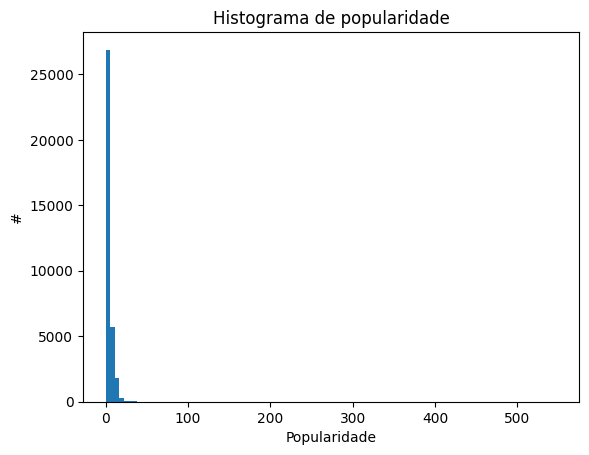

In [51]:
plot_hist(data["popularity"], "Popularidade", nbins=100, title="Histograma de popularidade")

In [52]:
data.loc[data["popularity"] > 20]

,adult,belongs_to_collection,genres,tmdb_id,imdb_id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_year,runtime,title,vote_average
0,False,toy story collection,"['animation', 'comedy', 'family']",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,['pixar_animation_studios'],['us'],1995,81.0,Toy Story,7.7
103,False,[],"['action', 'drama', 'history', 'war']",197,tt0112573,en,"Enraged at the slaughter of Murron, his new br...",20.755149,/2qAgGeYdLjelOEqjW9FYvPHpplC.jpg,"['icon_entertainment_international', 'the_ladd...",['us'],1995,177.0,Braveheart,7.7
245,False,star wars collection,"['adventure', 'action', 'science_fiction']",11,tt0076759,en,Princess Leia is captured and held hostage by ...,42.149697,/btTdmkgIvOi0FFip1sPuZI2oQG6.jpg,"['lucasfilm', 'twentieth_century_fox_film_corp...",['us'],1977,121.0,Star Wars,8.1
277,False,[],"['thriller', 'crime', 'drama']",101,tt0110413,fr,"Leon, the top hit man in New York, has earned ...",20.477329,/gE8S02QUOhVnAmYu4tcrBlMTujz.jpg,"['columbia_pictures', 'gaumont']","['fr', 'us']",1994,110.0,Leon: The Professional,8.2
280,False,[],"['thriller', 'crime']",680,tt0110912,en,"A burger-loving hit man, his philosophical par...",140.950236,/dM2w364MScsjFf8pfMbaWUcWrR.jpg,"['miramax_films', 'a_band_apart', 'jersey_films']",['us'],1994,154.0,Pulp Fiction,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37280,False,[],"['action', 'adventure', 'crime']",463906,tt2569088,en,"International master thief, Simon Templar, als...",28.235930,/n8tsrPLem70exhXHfSausV7FlPx.jpg,[],['us'],2017,92.0,The Saint,5.8
37292,False,[],"['action', 'crime', 'mystery', 'thriller']",395834,tt5362988,en,An FBI agent teams with the town's veteran gam...,40.796775,/fzsaNUcRH0cV2gg5rjQH83ZEI8M.jpg,"['thunder_road_pictures', 'star_thrower_entert...","['gb', 'us', 'ca']",2017,111.0,Wind River,7.4
37306,False,s.w.a.t. collection,"['action', 'crime', 'thriller']",461053,tt6014472,en,When a D.E.A. and S.W.A.T. cartel takedown end...,20.386910,/sGcDltZ2aUgLV7oFxGlpO1oGmc0.jpg,['original_film'],['us'],2017,89.0,S.W.A.T.: Under Siege,5.2
37319,False,[],"['fantasy', 'horror', 'thriller']",440597,tt5322012,en,A teenage girl discovers a box with magical po...,59.578823,/u0vnocj57vJt5DHoBEqUOD1G4SU.jpg,"['broad_green_pictures', 'busted_shark_product...",['ca'],2017,90.0,Wish Upon,5.3


Analisando a popularidade, os valores serão colocados em classes de popularidade:
0 - 0.0001 <= popularidade < 5  
1 - 5 <= popularidade < 10  
2 - 10 <= popularidade < 15  
3 - 15 <= popularidade < 20  
4 - popularidade >= 20  

#### Production countries

In [53]:
# Quais países estão nos dados
data_countries = data['production_countries']
countries_list = []
for aux_row in data_countries:
    countries_list.extend(aux_row.replace("'", "").strip("[]").split(", "))

available_countries = dict(Counter(countries_list))

# Selecionando países com menos de 100 filmes
uncommon_countries = [genre for genre, count in available_countries.items() if count < 100]

print(f"Countries: {len(available_countries)}")
print(f"Countries less than 100 movies: {len(uncommon_countries)}")

countries_replaced = []
for id_, countries in zip(data_countries.index, data_countries):
    country = countries.replace("'", "").strip("[]").split(", ")        
    filtered_countries = [c for c in country if c not in uncommon_countries]
    countries_replaced.append(str(filtered_countries))

data["production_countries"] = countries_replaced
summary(data, "production_countries")

Countries: 152
Countries less than 100 movies: 123
Description:
count      34852
unique      1098
top       ['us']
freq       16002
Name: production_countries, dtype: object
---
Unique values:
1098
---
Top 10 values:
                      count
production_countries       
['us']                16002
['']                   3267
['gb']                 2034
['fr']                 1404
['jp']                 1212
['it']                  745
['ca']                  687
['ru']                  654
['de']                  592
['gb', 'us']            566
---
Least 5 values:
                                      count
production_countries                       
['dk', 'za']                              1
['it', 'es', 'ar']                        1
['de', 'gb', 'us', 'za']                  1
['at', 'fr', 'de', 'it', 'gb', 'us']      1
['fr', 'de', 'ie', 'gb']                  1
---
IS_NULL: 0


In [54]:
# Apagar dados sem pais de produção
data.drop(data.loc[data["production_countries"].isin(["['']", "[]"])].index, inplace=True)

#### Production companies

In [55]:
summary(data, "production_companies")

Description:
count     31207
unique    18732
top          []
freq       4048
Name: production_companies, dtype: object
---
Unique values:
18732
---
Top 10 values:
                                            count
production_companies                             
[]                                           4048
['metro-goldwyn-mayer_(mgm)']                 640
['paramount_pictures']                        472
['warner_bros.']                              465
['twentieth_century_fox_film_corporation']    406
['universal_pictures']                        301
['rko_radio_pictures']                        216
['columbia_pictures_corporation']             183
['columbia_pictures']                         140
['mosfilm']                                   132
---
Least 5 values:
                                                    count
production_companies                                     
['kanzaman', 'rifkin-eberts', 'dune_entertainme...      1
['relativity_media', 'michaels-goldwyn']   

In [56]:
data["production_companies"] = data["production_companies"].replace({"[]": np.nan})

#### Belongs to collection

In [57]:
summary(data, "belongs_to_collection")

Description:
count     31207
unique     1373
top          []
freq      27583
Name: belongs_to_collection, dtype: object
---
Unique values:
1373
---
Top 10 values:
                                        count
belongs_to_collection                        
[]                                      27583
{                                          93
james bond collection                      26
the carry on collection                    25
zatôichi: the blind swordsman              25
charlie chan (sidney toler) collection     21
pokémon collection                         19
godzilla (showa) collection                16
dragon ball z (movie) collection           15
totò collection                            15
---
Least 5 values:
                             count
belongs_to_collection             
shadow warriors                  1
joséphine - saga                 1
cirque du soleil collection      1
dixie zombi - colección          1
my sassy girl collection         1
---
IS_NULL: 0


In [58]:
data["belongs_to_collection"] = data["belongs_to_collection"].replace({"[]": np.nan, "{": np.nan})

#### Adult

In [59]:
summary(data, "adult")

Description:
count     31207
unique        2
top       False
freq      31203
Name: adult, dtype: object
---
Unique values:
2
---
Top 10 values:
       count
adult       
False  31203
True       4
---
Least 5 values:
       count
adult       
False  31203
True       4
---
IS_NULL: 0


In [60]:
# Pouca variabilidade
data.drop(columns="adult", inplace=True)

#### Poster path

In [61]:
summary(data, "poster_path")

Description:
count                                31188
unique                               31184
top       /svdKfhT9WLfrC8zgOWmZt4mgyK0.jpg
freq                                     2
Name: poster_path, dtype: object
---
Unique values:
31184
---
Top 10 values:
                                  count
poster_path                            
/svdKfhT9WLfrC8zgOWmZt4mgyK0.jpg      2
/OSIG2OUQV1EQw23cpkIQRkoCMh.jpg       2
/xPAupWOWNT4oze9ACP0KW0mCLyB.jpg      2
/glFXjFSIhyPIPKsg86vqxo029oM.jpg      2
/s7oyVBwgPagZZsKEubWX605sBqp.jpg      1
/qy69qUm37dgkB6iw4ADcGY1G7Hi.jpg      1
/l0JcRxuZJVsrracoKxSRnt4xNhV.jpg      1
/flyelQOhTljphOS4LcVaNhDrTC1.jpg      1
/i3lHWk45UGxHEaSbH5Rdu1EWq8t.jpg      1
/rhIRbceoE9lR4veEXuwCC2wARtG.jpg      1
---
Least 5 values:
                                  count
poster_path                            
/xjdWBe3wn2UjVnN1D2husC1LjHG.jpg      1
/8NqbQppbfgc08z57Uh4fo2JR2t5.jpg      1
/9CrSPxDr7r01coqofKghYiGplAc.jpg      1
/4YnLxYLHhT4UQ8i9jxAXWy46Xuw.jpg      

In [62]:
# Não será relevante
data.drop(columns="poster_path", inplace=True)

In [63]:
data

,belongs_to_collection,genres,tmdb_id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_year,runtime,title,vote_average
0,toy story collection,"['animation', 'comedy', 'family']",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['pixar_animation_studios'],['us'],1995,81.0,Toy Story,7.7
1,NaN,"['adventure', 'fantasy', 'family']",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.015539,"['tristar_pictures', 'teitler_film', 'intersco...",['us'],1995,104.0,Jumanji,6.9
2,grumpy old men collection,"['romance', 'comedy']",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.712900,"['warner_bros.', 'lancaster_gate']",['us'],1995,101.0,Grumpier Old Men,6.5
3,NaN,"['comedy', 'drama', 'romance']",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['twentieth_century_fox_film_corporation'],['us'],1995,127.0,Waiting to Exhale,6.1
4,father of the bride collection,['comedy'],11862,tt0113041,en,Just when George Banks has recovered from his ...,8.387519,"['sandollar_productions', 'touchstone_pictures']",['us'],1995,106.0,Father of the Bride Part II,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37476,NaN,"['horror', 'mystery', 'thriller']",84419,tt0038621,en,An unsuccessful sculptor saves a madman named ...,0.222814,['universal_pictures'],['us'],1946,65.0,House of Horrors,6.3
37478,NaN,['horror'],289923,tt0252966,en,A film archivist revisits the story of Rustin ...,0.386450,"['neptune_salad_entertainment', 'pirie_product...",['us'],2000,30.0,The Burkittsville 7,7.0
37479,NaN,['science_fiction'],222848,tt0112613,en,It's the year 3000 AD. The world's most danger...,0.661558,['concorde-new_horizons'],['us'],1995,85.0,Caged Heat 3000,3.5
37480,NaN,"['drama', 'action', 'romance']",30840,tt0102797,en,"Yet another version of the classic epic, with ...",5.683753,"['westdeutscher_rundfunk_(wdr)', 'working_titl...","['ca', 'de', 'gb', 'us']",1991,104.0,Robin Hood,5.7


### Salvando dataset resultante

In [64]:
data.to_csv("datasets/movies_dataset_cleaned.csv", index=False)